In [197]:
import pickle
import numpy as np

with open('./ml_finalproj_train_vF.pkl', 'rb') as f:
    rawdata = pickle.load(f)

In [67]:
for i in data.timestamp:
    np.correlate(data[data[['timestamp','y']].groupby('timestamp').agg(mean),data.x49[0:-1])

array([-0.00162455], dtype=float32)

In [74]:
yuan = data[['timestamp','x49','x17','y']].groupby('timestamp').agg(np.mean)

In [81]:
for i in data.id:
    tmp = data[data.id==i][['timestamp','y','x49','x17']]

array([  8.19499382e-06], dtype=float32)

In [3]:
data.columns.shape

(31,)

In [4]:
data.timestamp.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [5]:
data.id.unique().shape

(665,)

In [6]:
data.weight.max()

37351864.0

In [7]:
data.weight.min()

451997.12

In [66]:
categorical = []
for i in data.columns:
    if i!='timestamp' and data[i][:1000].unique().shape[0]<20:
        categorical.append(i)
categorical

['x42', 'x30', 'x2', 'x6', 'x46', 'x25', 'x13', 'x28', 'x51', 'x29']

In [68]:
notin = ['id','y','weight','timestamp']

In [206]:
continum = [i for i in data.columns if i not in categorical and i not in notin]
continum
len(continum)

24

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
timestamps = data.timestamp.unique()

In [13]:
ave_y = []
for i in timestamps:
    ave_y.append(data.y[data.timestamp==i].mean())
ave_y = np.array(ave_y)

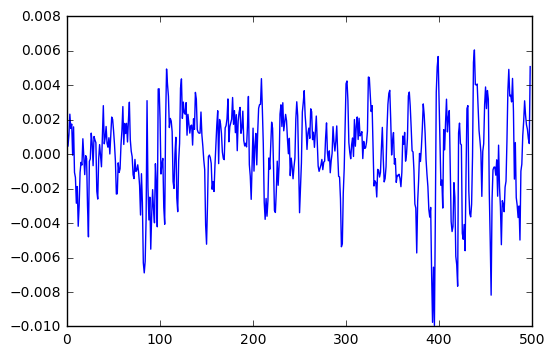

In [14]:
plt.plot(ave_y)

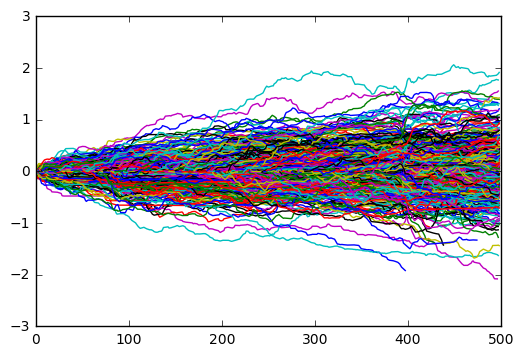

In [15]:
for i in data.id.unique():
    plt.plot(data[data.id==i]['timestamp'], data[data.id==i]['y'].cumsum())

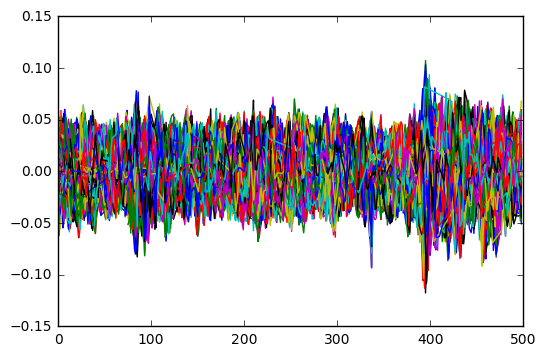

In [16]:
for i in data.id.unique():
    plt.plot(data[data.id==i]['timestamp'], data[data.id==i]['y'])

In [17]:
for i in data.id.unique():
    print(data[data.id==i]['timestamp'].min(), data[data.id==i]['timestamp'].max(), data[data.id==i].shape[0])

0 496 254
0 498 250
0 498 258
0 497 256
0 381 26
0 498 254
0 497 230
0 497 248
0 406 153
0 498 253
0 493 243
0 341 117
0 494 253
0 498 242
0 498 234
0 492 234
0 498 216
0 498 249
0 498 245
0 467 221
0 496 249
0 498 255
0 496 257
0 498 239
0 497 243
0 498 265
0 28 16
0 496 231
0 497 244
0 498 247
0 496 259
0 498 254
0 497 244
0 496 221
0 496 260
0 497 240
0 496 245
0 482 239
0 497 259
0 493 248
0 498 258
0 498 245
0 498 251
0 495 247
0 498 257
0 496 239
0 495 229
0 496 249
0 498 222
0 496 240
0 498 238
0 498 265
0 495 254
0 498 243
0 497 235
0 498 254
0 498 242
0 498 246
0 498 259
0 497 261
0 424 203
0 496 256
0 497 196
0 497 262
0 498 244
0 498 244
0 498 258
0 496 253
0 498 184
0 497 241
0 496 263
0 498 231
0 497 261
0 495 255
0 497 237
0 497 252
0 494 238
0 498 233
0 498 255
0 498 248
0 498 222
0 498 270
0 87 30
0 219 33
0 498 247
0 498 247
0 498 270
0 497 258
0 497 231
0 498 239
0 498 251
0 496 233
0 497 239
0 29 15
0 498 244
0 498 243
0 497 246
0 498 254
0 498 244
0 497 257
0 498 25

In [19]:
import numpy as np

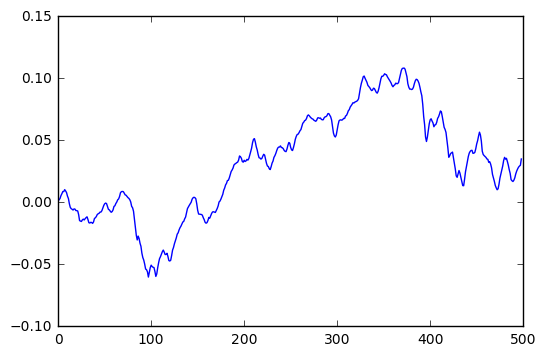

In [20]:
# Cumulative average return
cum_y = np.cumsum(ave_y)
plt.plot(cum_y)

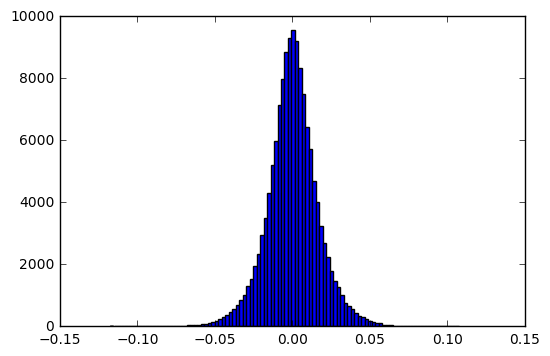

In [21]:
# Historgram of return (pretty normal)
_ = plt.hist(data.y, 100)

In [73]:
lower_bound = np.percentile(data.y, 1)
higher_bound = np.percentile(data.y, 99)

In [75]:
from sklearn.preprocessing import StandardScaler

In [194]:
train_ratio = 0.8
select = (data.y >= lower_bound) & (data.y <= higher_bound)
data = data[select]
# sc = StandardScaler()
# data[continum] = sc.fit_transform(data[continum].values)
# data_train = data.iloc[:int(train_ratio*data.shape[0]),:]
# data_test = data.iloc[int(train_ratio*data.shape[0]):,:]

In [18]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(data_clean_train[continum], data_clean_train['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_predict = lr.predict(data_clean_test[continum])

In [22]:
from sklearn.metrics import r2_score

In [32]:
# unweighted r2
1-sum((y_predict-data_clean_test['y'])**2)/sum((data_clean_test['y']-data_clean_test['y'].mean())**2)

9.9457867828167679e-05

In [33]:
# weighted r2
1-sum((np.sqrt(data_clean_test['weight']).values*(y_predict-data_clean_test['y']))**2)/sum((np.sqrt(data_clean_test['weight']).values*(data_clean_test['y']-data_clean_test['y'].mean()))**2)

-0.00037653414561589216

In [213]:
data[continum].corrwith(data.y).sort_values(ascending=False)

x22_4    0.040058
x17_4    0.033425
x22      0.022143
x17      0.016568
x53      0.015553
x49      0.009891
x25      0.005723
x28      0.004931
x30      0.002624
x16      0.002305
x62      0.001745
x63      0.001533
x39      0.001137
x9       0.000527
x13     -0.000223
x21     -0.000740
x5      -0.001070
x37     -0.001104
x64     -0.001254
x42     -0.002907
x65     -0.003446
x66     -0.005832
x61     -0.006565
x0      -0.015597
dtype: float64

In [ ]:
feat = ['x22', 'x0', 'x17', 'x53']

In [ ]:
time_count = np.zeros(data.timestamp.unique().shape[0])
for i in data.timestamp:
    time_count[i] += 1

In [ ]:
plt.plot(time_count)

In [ ]:
np.diff(time_count).argmax()

In [ ]:
np.diff(time_count).argmin()

In [ ]:
np.diff(ave_y).argmin()

In [ ]:
# Rebalance of portfolio
plt.plot(cum_y)
plt.plot(np.diff(time_count)/max(np.diff(time_count))/10)

In [ ]:
sell = []
for i in data.id[data.timestamp==421].values:
    if i not in data.id[data.timestamp==422].values:
        sell.append(i)

In [ ]:
buy = []
for i in data.id[data.timestamp==422].values:
    if i not in data.id[data.timestamp==421].values:
        buy.append(i)

In [79]:
import xgboost as xgb
import time
import pandas as pd

In [93]:
continum = continum+['x22_4','x17_4']

In [109]:
categorical.remove('x13')
categorical.remove('x28')

In [147]:
del continum[17]

In [195]:
# Forward chaining cross validation
K = 5
score = 0

for i in range(1, K):
    cut1 = data.timestamp.unique().shape[0]/K*i
    cut2 = data.timestamp.unique().shape[0]/K*(i+1)
    X_train = data[continum+categorical][data.timestamp <= cut1].values
    y_train = data.y[data.timestamp <= cut1].values
    weight_train = data.weight[data.timestamp <= cut1].values
    X_valid = data[continum+categorical][(data.timestamp > cut1) & (data.timestamp <= cut2)].values
    y_valid = data.y[(data.timestamp > cut1) & (data.timestamp <= cut2)].values
    weight_valid = data.weight[(data.timestamp > cut1) & (data.timestamp <= cut2)].values

    feat = continum+categorical
    xgmat_train = xgb.DMatrix(X_train, label=y_train, weight=weight_train, feature_names=continum+categorical)
    xgmat_valid = xgb.DMatrix(X_valid, label=y_valid, weight=weight_valid, feature_names=continum+categorical)

    params_xgb = {'objective':'reg:linear',
                  'eta'             : 0.05,
                  'max_depth'       : 6,
                  'gamma'           : 0.0001,
                  'subsample'       : 0.9,
                  'colsample_bytree': 0.9,
                  'min_child_weight': 100,
                  'base_score':0.000
#                   'seed' : 17
                  }

    bst = xgb.train(params_xgb, xgmat_train, 10)
#     print("Done: %.1fs" % (time.time() - t0))
    print('test r2', r2_score(y_valid, bst.predict(xgmat_valid)))
    print('test weighted r2', r2_score(y_valid, bst.predict(xgmat_valid), weight_valid))
    score += r2_score(y_valid, bst.predict(xgmat_valid), weight_valid)
    print('train r2', r2_score(y_train, bst.predict(xgmat_train)))
    print('train weighted r2', r2_score(y_train, bst.predict(xgmat_train), weight_train))
    print('\n')
print("Final score is {}".format(score/K))

test r2 -0.00278351210993
test weighted r2 -0.00159798057491
train r2 0.0198840011555
train weighted r2 0.0238263081106


test r2 0.000118037074542
test weighted r2 -4.31178839471e-05
train r2 0.00996507352528
train weighted r2 0.0123395025136


test r2 0.000859746243913
test weighted r2 0.00064595609341
train r2 0.0081263615964
train weighted r2 0.00885738263976


test r2 0.000875781849064
test weighted r2 -6.2597581274e-05
train r2 0.00718243875389
train weighted r2 0.00692622094588


Final score is -0.00021154798934479578


In [158]:
# categorical.remove('x25')
# categorical.remove('x30')
# categorical.remove('x42')
categorical.append('x51')
categorical

['x2', 'x6', 'x46', 'x29', 'x51']

In [189]:
categorical.append('x29')

In [198]:
score = 0
cut = 400

X_train = data[continum+categorical][data.timestamp <= cut].values
y_train = data.y[data.timestamp <= cut].values
weight_train = data.weight[data.timestamp <= cut].values
X_valid = data[continum+categorical][data.timestamp > cut].values
y_valid = data.y[data.timestamp > cut].values
weight_valid = data.weight[data.timestamp > cut].values

feat = continum+categorical
xgmat_train = xgb.DMatrix(X_train, label=y_train, weight=weight_train, feature_names=continum+categorical)
xgmat_valid = xgb.DMatrix(X_valid, label=y_valid, weight=weight_valid, feature_names=continum+categorical)


params_xgb = {'objective':'reg:linear',
                'eta'             : 0.05,
                'max_depth'       : 6,
                'gamma'           : 0.0001,
                'subsample'       : 0.9,
                'colsample_bytree': 0.9,
                'min_child_weight': 100,
#                 'lambda'          : 1.0,
                'base_score':0.000
                }

for i in range(17, 18):
#     params_xgb['seed'] = i
    bst = xgb.train(params_xgb, xgmat_train, 10)
    print('seed # {}'.format(i))
    print('test r2', r2_score(y_valid, bst.predict(xgmat_valid)))
    print('test weighted r2', r2_score(y_valid, bst.predict(xgmat_valid), weight_valid))
    print('train r2', r2_score(y_train, bst.predict(xgmat_train)))
    print('train weighted r2', r2_score(y_train, bst.predict(xgmat_train), weight_train))

seed # 17
test r2 0.00116970683857
test weighted r2 3.71774674127e-05
train r2 0.00719129232602
train weighted r2 0.00714838714343


In [201]:
for line in bst.get_dump(with_stats=True)[0].splitlines()[:10]:
    print(line)

0:[x22_4<0.000570388] yes=1,no=2,missing=1,gain=37694.3,cover=3.69446e+11
	1:[x22_4<-0.000151967] yes=3,no=4,missing=3,gain=28815.6,cover=3.63303e+11
		3:[x53<-0.00104912] yes=7,no=8,missing=7,gain=21550.2,cover=8.75377e+10
			7:[x61<3.23526e+06] yes=15,no=16,missing=15,gain=11805,cover=4.76715e+09
				15:[x2<8.5] yes=31,no=32,missing=31,gain=6279.68,cover=1.9641e+09
					31:[x39<0.000577543] yes=63,no=64,missing=63,gain=9700.18,cover=1.48431e+09
						63:leaf=-0.000231272,cover=1.1752e+09
						64:leaf=8.35082e-05,cover=3.09114e+08
					32:[x65<-6.15232] yes=65,no=66,missing=65,gain=8013.07,cover=4.79791e+08
						65:leaf=0.000386964,cover=3.22841e+07


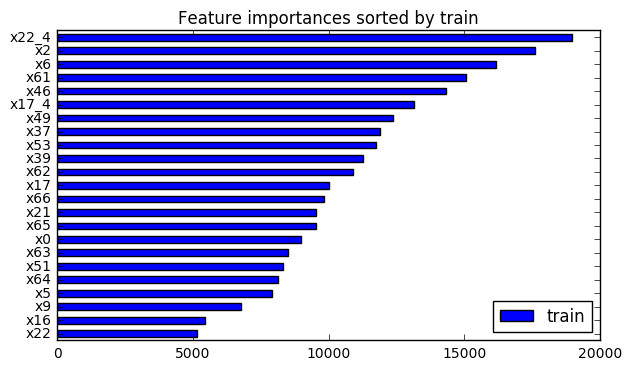

In [184]:
imp = pd.DataFrame(index=continum+categorical)
imp['train'] = pd.Series(bst.get_score(importance_type='gain'), index=continum+categorical)
ax = imp.sort_values('train').plot.barh(title='Feature importances sorted by train', figsize=(7,4))

In [182]:
r2_score(y_valid, bst.predict(xgmat_valid), weight_valid)

0.00061325122487365658

In [ ]:
print(score/K)

In [ ]:
params_xgb.update({'process_type': 'update',
                   'updater'     : 'refresh',
                   'refresh_leaf': False})

In [ ]:
t0 = time.time()
print("Refreshing")
bst_after = xgb.train(params_xgb, xgmat_valid, 10, xgb_model=bst)
print("Done: %.1fs" % (time.time() - t0))

In [ ]:
# Before refresh
for line in bst.get_dump(with_stats=True)[0].splitlines()[:10]:
    print(line)

In [ ]:
# After refresh
for line in bst_after.get_dump(with_stats=True)[0].splitlines()[:10]:
    print(line)

In [ ]:
imp = pd.DataFrame(index=feat)
imp['train'] = pd.Series(bst.get_score(importance_type='gain'), index=feat)

# OOB feature importance
imp['OOB'] = pd.Series(bst_after.get_score(importance_type='gain'), index=feat)
imp = imp.fillna(0)

In [ ]:
ax = imp.sort_values('train').tail(10).plot.barh(title='Feature importances sorted by train', figsize=(7,4))

In [ ]:
ax = imp.sort_values('OOB').tail(10).plot.barh(title='Feature importances sorted by OOB', xlim=(0,0.07), figsize=(7,4))

In [ ]:
for i in range(10, 110, 10):
    print ("Training", i)
    t0 = time.time()
    params_xgb['min_child_weight'] = i
    bst = xgb.train(params_xgb, xgmat_train, 10)
    print("Done: %.1fs" % (time.time() - t0))
    print(r2_score(y_valid, bst.predict(xgmat_valid)))

In [ ]:
r2_score(y_valid, bst.predict(xgmat_valid))

In [ ]:
# Linear regression with most correlated features
feat_to_use = ['x22','x0','x17']
aa = 430
lr.fit(data[feat_to_use][data.timestamp<=aa]/data.weight[data.timestamp<=aa], data.y[data.timestamp<=aa]/data.weight[data.timestamp<=aa])

/Users/wenhaohu/anaconda2/envs/py3k/lib/python3.5/site-packages/pandas/indexes/base.py:2482: RuntimeWarning: unorderable types: str() < int(), sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


In [ ]:
data[feat_to_use][data.timestamp<=aa]/data.weight[data.timestamp<=aa]

In [121]:
r2_score(data.y[data.timestamp>aa], lr.predict(data[feat_to_use][data.timestamp>aa]))

0.00075638311237335998

In [122]:
print(1-sum((data.weight[data.timestamp>aa]*(data.y[data.timestamp>aa]-lr.predict(data[feat_to_use][data.timestamp>aa])))**2)/sum((data.weight[data.timestamp>aa]*(data.y[data.timestamp>aa]-np.mean(data.y[data.timestamp>aa])))**2))

-5.78472217088e-05


In [124]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
import scipy.stats
from sklearn.preprocessing import StandardScaler
from sklearn import tree

def AddShiftedY(data):
    new_data = pd.concat([data, pd.DataFrame(np.zeros([data.shape[0], 2]), columns={'x22_4','x17_4'})], axis=1)
    ids = new_data['id'].unique()
    for i in ids:
        s_i = data.loc[data.id==i, ['x22', 'x17']]
        x22_i = s_i.x22
        x17_i = s_i.x17
        new_data.loc[data.id==i, 'x22_4'] = x22_i.rolling(window=5, min_periods=1).mean()
        new_data.loc[data.id==i, 'x17_4'] = x17_i.rolling(window=5, min_periods=1).mean()
    return new_data


data=AddShiftedY(rawdata)
data=data.loc[~data.x22_4.isnull()]

In [198]:
test = data.y

In [62]:
# Test shifted features

import pandas as pd

def AddShiftedX(data):
    column_to_add = ["x49_-1", "x39_-1", "x17_-1", "x53_-1", "x21_-1", "x9_-1", "x22_-1", "x37_-1"]
    column_to_use = ["x49", "x39", "x17", "x53", "x21", "x9", "x22", "x37"]
    new_data = pd.concat([data, pd.DataFrame(np.zeros([data.shape[0], len(column_to_use)]), columns=column_to_add)], axis=1)
    ids = new_data['id'].unique()
    for i in ids:
        s_i = data.loc[new_data.id==i, column_to_use]
        new_data.loc[new_data.id==i, column_to_add] = s_i.shift(-1).values
    new_data.fillna(0, inplace=True)
    return new_data
    
new_data = AddShiftedX(raw_data)

In [63]:
K = 5
score = 0
feat = [i for i in new_data.columns if i not in ['y', 'weight', 'timestamp']]
lr = LinearRegression()

for i in range(K):
    cut1 = new_data.timestamp.unique().shape[0]/K*i
    cut2 = new_data.timestamp.unique().shape[0]/K*(i+1)
    X_train = new_data[feat][new_data.timestamp <= cut1].values
    y_train = new_data.y[new_data.timestamp <= cut1].values
    weight_train = new_data.weight[new_data.timestamp <= cut1].values
    X_valid = new_data[feat][(new_data.timestamp > cut1) & (new_data.timestamp <= cut2)].values
    y_valid = new_data.y[(new_data.timestamp > cut1) & (new_data.timestamp <= cut2)].values
    weight_valid = new_data.weight[(new_data.timestamp > cut1) & (new_data.timestamp <= cut2)].values



#     print ("Training")
#     t0 = time.time()
    lr.fit(X_train, y_train)
#     print("Done: %.1fs" % (time.time() - t0))
#     lr.predict(X_valid)
    print('test r2', r2_score(y_valid, lr.predict(X_valid)))
    print('test weighted r2', r2_score(y_valid, lr.predict(X_valid), weight_valid))
    score += r2_score(y_valid, lr.predict(X_valid), weight_valid)
    print('train r2', r2_score(y_train, lr.predict(X_train)))
    print('train weighted r2', r2_score(y_train, lr.predict(X_train), weight_train))
    print('\n')
print("Final score is {}".format(score/K))

test r2 0.0348243372827
test weighted r2 -0.00108591203613
train r2 0.371426698002
train weighted r2 0.391629319722


test r2 0.266100339315
test weighted r2 0.239633560298
train r2 0.277421370009
train weighted r2 0.256073225509


test r2 0.251165776698
test weighted r2 0.228194946628
train r2 0.276084589381
train weighted r2 0.253837530212


test r2 0.24240043068
test weighted r2 0.223102749748
train r2 0.268437669878
train weighted r2 0.245409710454


test r2 0.27492795366
test weighted r2 0.257938008657
train r2 0.261240643525
train weighted r2 0.239395929889


Final score is 0.18955667065890164


In [59]:
column_to_add = ["x49_-1", "x39_-1", "x17_-1", "x53_-1", "x21_-1", "x9_-1", "x22_-1", "x37_-1"]
column_to_use = ["x49", "x39", "x17", "x53", "x21", "x9", "x22", "x37"]
pd.concat([data, pd.DataFrame(np.zeros([data.shape[0], len(column_to_use)]), columns=column_to_add)], axis=1)

timestamp   id       x22  x42       x16       x17  x30       x39  \
0               0  253 -0.000080   11 -0.000544  0.000266    1  0.000301   
1               0   25 -0.000037    1  0.000130  0.000164    5 -0.001161   
2               0  175 -0.001730    1  0.000145 -0.000838    9 -0.000949   
3               0  618  0.000683   10 -0.000386 -0.001025    1 -0.000060   
4               0  199  0.001110    3  0.000045 -0.000649    1  0.002820   
5               0   13  0.000261    1 -0.000355  0.000117    5  0.000093   
6               0  209  0.000090    1  0.001953 -0.000827   11  0.000239   
7               0  508 -0.001093    1  0.000463 -0.000801   10 -0.001837   
8               0  379  0.000711    9  0.000040 -0.000468    1 -0.000366   
9               0  227 -0.000420   10 -0.000186  0.000452    1  0.000080   
10              0  515  0.000599    1 -0.000073  0.000365    5  0.000154   
11              0  433  0.000504   11 -0.000700 -0.000086    1 -0.001148   
12              0   29  0.000117    1  0.000376 -0.000388    9 -0.000045   
13              0  221 -0.000604    8  0.000437 -0.000327    1  0.001630   
14              0  141  0.000574    1  0.000524  0.000002    9 -0.000439   
15              0   27  0.000346    1  0.001362  0.000289   10 -0.000208   
16              0   91 -0.000158   10 -0.000025 -0.000092    1 -0.000099   
17              0  146 -0.000562    7 -0.000476 -0.000359    1  0.000394   
18              0    1 -0.000243    6 -0.000699  0.000172    1  0.000348   
19              0  507  0.000717    9 -0.000307 -0.001048    1  0.000087   
20              0  543  0.000288    9 -0.000558 -0.000464    1  0.000342   
21              0  566  0.000349    7 -0.000155  0.000081    1 -0.000496   
22              0  449  0.000209    1  0.000021  0.001229    6  0.000045   
23              0  307  0.000272    1 -0.000350  0.000111    7 -0.000317   
24              0  530  0.000329    1  0.000104  0.000352   11  0.000281   
25              0  549  0.000233    9 -0.000533 -0.000681    1  0.000156   
26              0  279  0.001370    4 -0.000885  0.001370    1 -0.000642   
27              0  483 -0.000379    1  0.001061  0.001587    7  0.000394   
28              0   36 -0.000252   10 -0.001717  0.000427    1  0.000418   
29              0  266  0.000184    8 -0.000150 -0.000665    1 -0.000433   
...           ...  ...       ...  ...       ...       ...  ...       ...   
141133        498  171 -0.000095    1 -0.000068  0.000812    1  0.000046   
141134        498  146  0.000254    1 -0.000128 -0.000235   11 -0.000089   
141135        498  348  0.000338    1  0.000211 -0.000337    4 -0.000443   
141136        498  608  0.001696    1 -0.000115 -0.000920    1  0.000433   
141137        498  557 -0.000604    8 -0.000078 -0.000172    1  0.000668   
141138        498  226  0.001234    1 -0.000107 -0.001478   10 -0.000306   
141139        498   91 -0.000029    2 -0.000078  0.000027    1 -0.000026   
141140        498  220 -0.000190    6  0.000461 -0.000055    1 -0.000255   
141141        498  292  0.001068    1 -0.000151  0.000068    9  0.001346   
141142        498  387 -0.000706    7 -0.001764  0.000990    1 -0.000839   
141143        498  162  0.000096    1 -0.000111  0.000629    8 -0.000005   
141144        498  141  0.000022   11 -0.000123 -0.000159    1  0.000051   
141145        498  221  0.001123    8 -0.000114  0.001014    1 -0.001067   
141146        498  353 -0.000133    8 -0.000131  0.001036    1  0.000078   
141147        498  168  0.000355   11 -0.000075 -0.000752    1 -0.000031   
141148        498  227 -0.000701    4 -0.000131  0.000237    1 -0.000562   
141149        498  528 -0.000026    1 -0.000093 -0.000165    1 -0.000255   
141150        498  290 -0.000351    1  0.001335 -0.000021    5 -0.000730   
141151        498  503 -0.000350   11 -0.000148 -0.000499    1  0.001060   
141152        498  224 -0.001023    9 -0.000233  0.000063    1 -0.001487   
141153        498  452  0.000234    1 -0.000106 -0.00008